Kaggle link:https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Set Information:

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.



### Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns

 1. UID: unique identifier ranging from 1 to 10000

 2. product ID: consisting of a letter 

 3. L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality
    variants and a variant-specific serial number

 4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

 5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

 6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

 7. torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

 8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. 

    'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the   following failure modes are true.

 9. The machine failure consists of five independent failure modes

 10. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins

     (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

 11. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process 

     temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

  12. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If 
  
     this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
    
    
  13. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 
      M,13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
    

  14. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case

      for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

      If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is 

      therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail



In [2]:
df=pd.read_csv('pred maintenance dataset.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* We do not have any missing values in our dataset¶

In [5]:
df.duplicated().sum()

0

* No duplicate value is seen.

In [6]:
len(df.UDI.unique())

10000

##### Let's have a look at unique values for each column

In [7]:
df.apply(lambda c: len(c.unique()), axis = 0)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

* Conclusion : The columns UDI, Product ID, are unique for each observation, which means they won't have an impact on the performance.

     Therefore, we will drope it.

In [8]:
df.drop(['UDI', 'Product ID'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


<AxesSubplot:xlabel='Type', ylabel='count'>

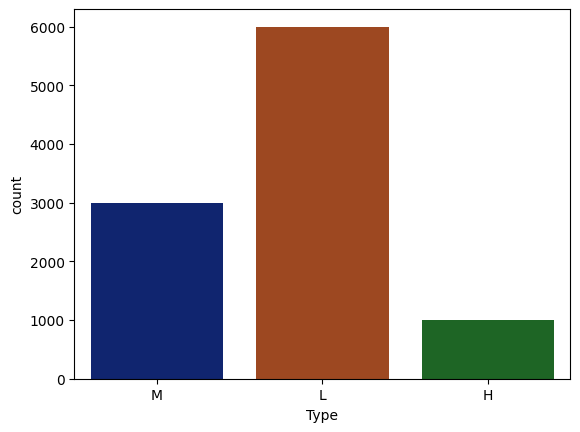

In [10]:
sns.countplot(data=df,x=df['Type'],palette='dark')

* Data of Type feature is Categorical.

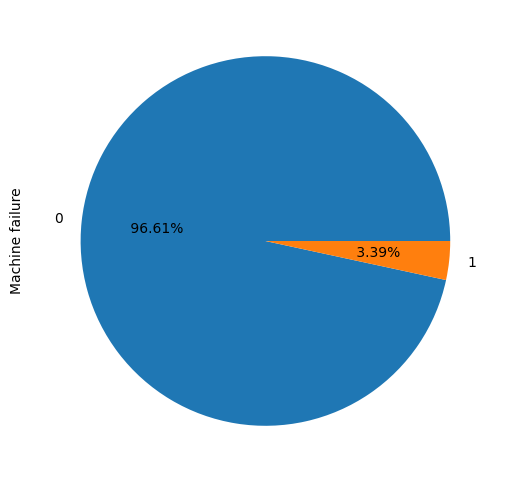

In [11]:
plt.figure(figsize=(6,6))
df['Machine failure'].value_counts().plot.pie(autopct='% 1.2f%%')
plt.show()

 * Above graph shows data is Highly Imbalanced.

## Encoding:-
    It convert categorical data of 'Type' column into Numerical values.

### Balancing of Data by using Over Sampling and splitting of data into features and target.

In [12]:
x = df.drop("Machine failure",axis=1)
y = df["Machine failure"]

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("oencoder",OrdinalEncoder(),["Type"])],remainder="passthrough")
x=ct.fit_transform(x)

In [14]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
x,y = sm.fit_resample(x,y)
x.shape,y.shape

((19322, 11), (19322,))

In [17]:
x=pd.DataFrame(x,columns=[df.drop("Machine failure",axis=1).columns])

<AxesSubplot:ylabel='Machine failure'>

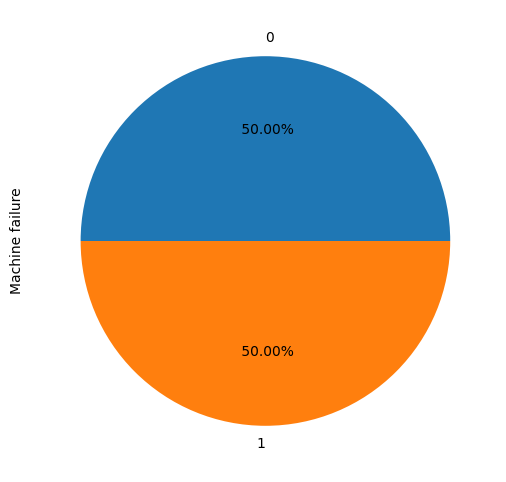

In [18]:
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct='% 1.2f%%',explode=(0,0))

* Now By seeing above graph we says that Dataset is Balanced

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x.iloc[:,:] = sc.fit_transform(x.iloc[:,:])
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1.545592,-1.208000,-1.172563,0.118549,-0.150854,-1.793867,-0.286868,-0.490911,-0.414187,-0.432451,-0.054326
1,-0.356136,-1.156732,-1.097171,-0.369575,0.098054,-1.750887,-0.286868,-0.490911,-0.414187,-0.432451,-0.054326
2,-0.356136,-1.208000,-1.247954,-0.062364,0.318514,-1.722233,-0.286868,-0.490911,-0.414187,-0.432451,-0.054326
3,-0.356136,-1.156732,-1.172563,-0.284238,-0.385538,-1.693580,-0.286868,-0.490911,-0.414187,-0.432451,-0.054326
4,-0.356136,-1.156732,-1.097171,-0.369575,-0.349980,-1.664926,-0.286868,-0.490911,-0.414187,-0.432451,-0.054326


### Splitting of Data into train & test

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0)

In [21]:
xtrain.shape

(13525, 11)

In [22]:
xtest.shape

(5797, 11)

In [23]:
ytrain.shape

(13525,)

In [24]:
xtest.shape

(5797, 11)

## Model Building

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score

In [26]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain) # build model
    ypred = model.predict(xtest) #predicted value of y
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'training accuracy {train}')
    print(f'testing accuracy {test}')
    print(f'Model Name : {model}')
    print(classification_report(ytest,ypred))

In [28]:
mymodel(logreg)

training accuracy 0.9941589648798521
testing accuracy 0.9927548732102812
Model Name : LogisticRegression()
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2902
           1       1.00      0.99      0.99      2895

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797



In [29]:
mymodel(knn)

training accuracy 0.9984473197781886
testing accuracy 0.9972399516991547
Model Name : KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



In [30]:
mymodel(dt)

training accuracy 1.0
testing accuracy 0.997929963774366
Model Name : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



In [31]:
mymodel(svm)

training accuracy 0.9949722735674676
testing accuracy 0.9930998792478868
Model Name : SVC()
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2902
           1       1.00      0.99      0.99      2895

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797



## Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
cr = classification_report(ytest,ypred)
train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(dt)
print(cr)

training accuracy 0.9999260628465804
testing accuracy 0.9981024667931688
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
cr = classification_report(ytest,ypred)
train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 1.0
testing accuracy 0.9984474728307745
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



## Voting Classifier

In [34]:
models=[]
models.append(('logistic regression',logreg))
models.append(('KNN',knn))
models.append(('Support vector machine',svm))
models.append(('Decision Tree',dt))

In [35]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
cr = classification_report(ytest,ypred)
train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.9949722735674676
testing accuracy 0.9930998792478868
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2902
           1       1.00      0.99      0.99      2895

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797



## Boosting

### 1.Adaptive Boosting

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred = ad.predict(xtest)
cr = classification_report(ytest,ypred)
train = ad.score(xtrain,ytrain)
test = ad.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.9998521256931608
testing accuracy 0.9989649818871831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



### 2.Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
cr = classification_report(ytest,ypred)
train = gb.score(xtrain,ytrain)
test = gb.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.9989648798521257
testing accuracy 0.9981024667931688
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



### 3. Extreme Gradient Boost

In [38]:
#from xgboost import XGBClassifier
#xg=XGBClassifier()
# = classification_report(ytest,ypred)
#train = xg.score(xtrain,ytrain)
#test = xg.score(xtest,ytest)
#print(f'training accuracy {train}')
#print(f'testing accuracy {test}')
#print(cr)

### Hyper parameter Tunning

In [39]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(xtrain,ytrain)
ypred = cv.predict(xtest)
cr = classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2895

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



In [40]:
accuracy = cv.best_score_

In [41]:
accuracy

0.9991866913123845

In [42]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

In [43]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

### Predicting New Observations:

In [45]:
import pickle

In [47]:
pickle.dump(ct,open("coltransformer.pkl","wb"))
pickle.dump(sc,open("sc.pkl","wb"))
pickle.dump(gb,open("gb.pkl","wb"))

In [50]:
df[df["Machine failure"]==1]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0
